In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('vgsales.csv')
print(df.head(10))

df.dropna(inplace=True)

df['Year'] = df['Year'].astype(int)

print("Dados limpos com sucesso! Agora estamos prontos para criar os gráficos.")

   Rank                       Name Platform    Year         Genre Publisher  \
0     1                 Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2          Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3             Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4          Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5   Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   
5     6                     Tetris       GB  1989.0        Puzzle  Nintendo   
6     7      New Super Mario Bros.       DS  2006.0      Platform  Nintendo   
7     8                   Wii Play      Wii  2006.0          Misc  Nintendo   
8     9  New Super Mario Bros. Wii      Wii  2009.0      Platform  Nintendo   
9    10                  Duck Hunt      NES  1984.0       Shooter  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29

C:\Users\Win 11\AppData\Local\Temp\ipykernel_1288\2293787531.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_genero.values, y=vendas_genero.index, palette='viridis')


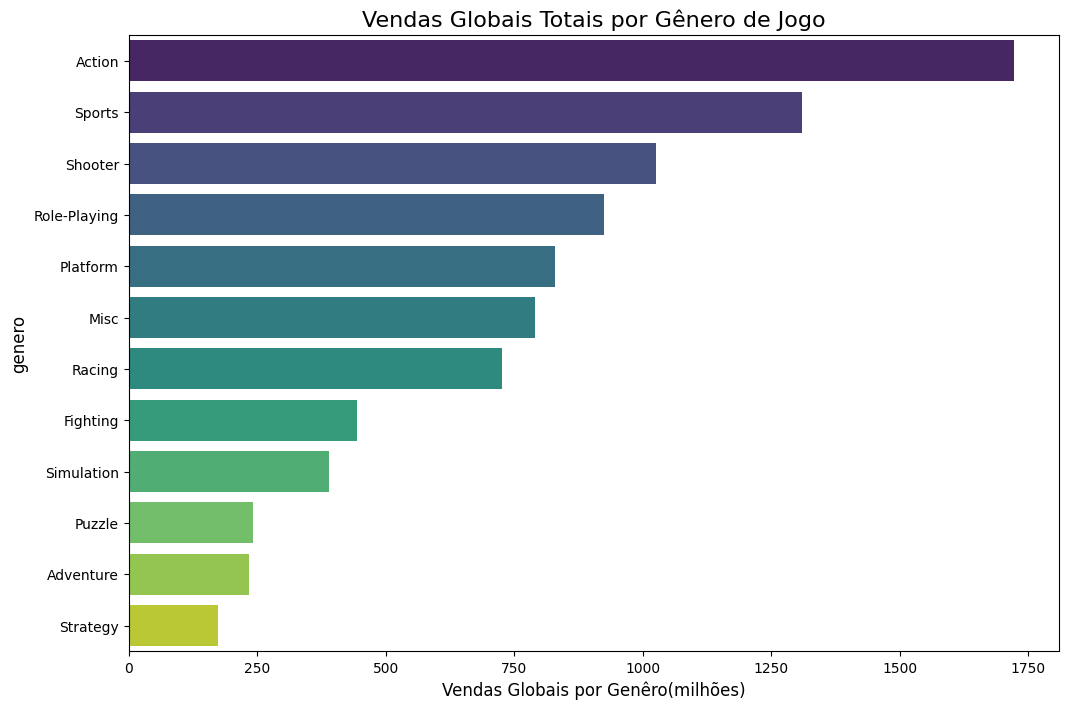

In [40]:



#tamanho do grafico.
plt.figure(figsize=(12,8))


#aqui estou selecionando as vendas globais por genero somando e ordenando do maior para o menor.
vendas_genero = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

#usando seaborn para criar grafico de barras.
sns.barplot(x=vendas_genero.values, y=vendas_genero.index, palette='viridis')

#estou colocando os nomes(labels) nos eixos x e y.
plt.title('Vendas Globais Totais por Gênero de Jogo', fontsize=16)
plt.xlabel('Vendas Globais por Genêro(milhões)', fontsize =12)
plt.ylabel('genero', fontsize =12)

plt.show()

C:\Users\Win 11\AppData\Local\Temp\ipykernel_1288\1709482741.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_plataforma.values, y=vendas_plataforma.index, palette='icefire')


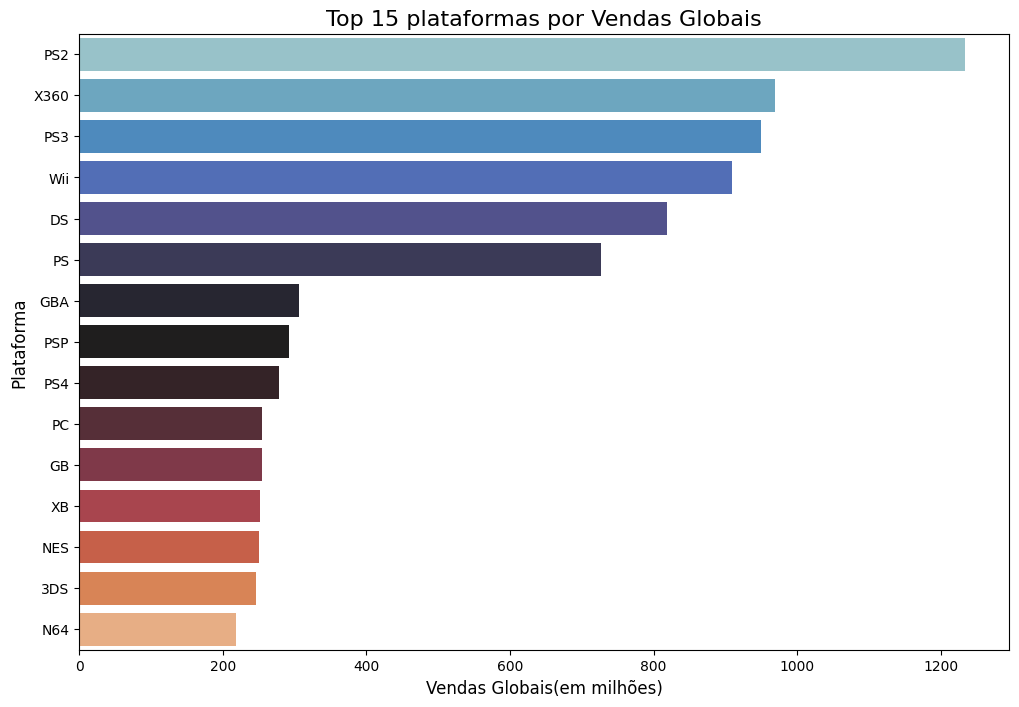

In [41]:
#Análise da vendas por plataformas ao longo do tempo

plt.figure(figsize=(12,8))

vendas_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(15)

sns.barplot(x=vendas_plataforma.values, y=vendas_plataforma.index, palette='icefire')

plt.title('Top 15 plataformas por Vendas Globais', fontsize=16)
plt.xlabel('Vendas Globais(em milhões)', fontsize=12)
plt.ylabel('Plataforma', fontsize=12)

plt.show()

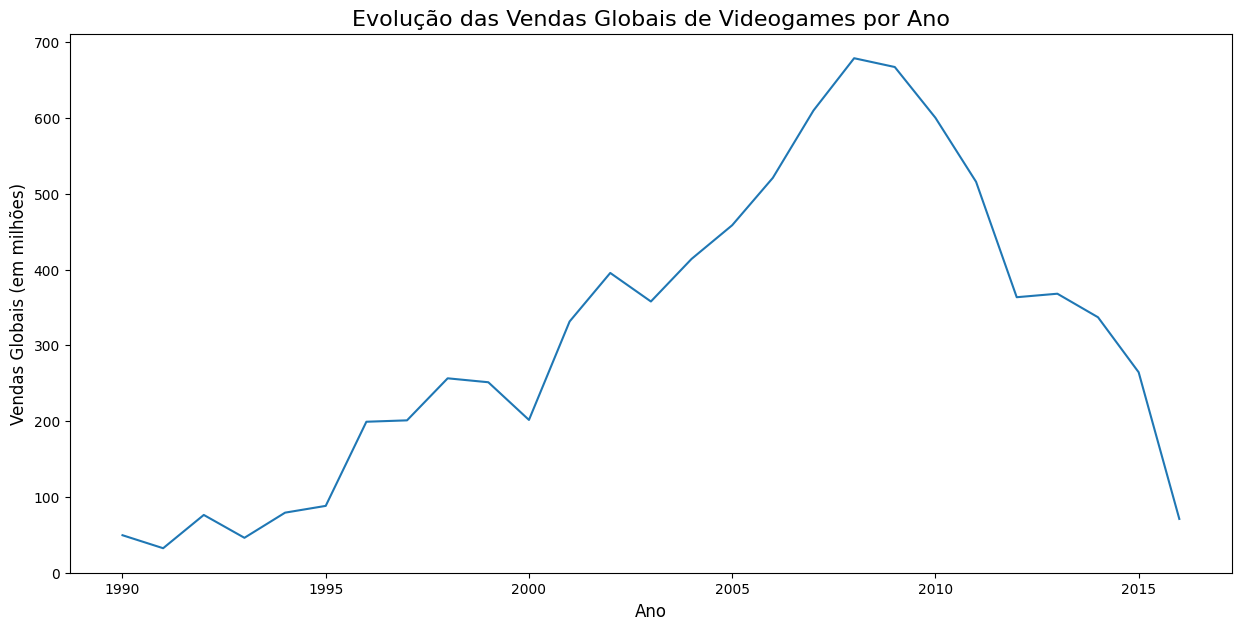

In [42]:
#Analise de crescimento da indústria de games

plt.figure(figsize=(15,7))

vendas_por_ano = df.groupby('Year')['Global_Sales'].sum().reset_index()
vendas_por_ano = vendas_por_ano[vendas_por_ano['Year'].between(1990, 2016)]

sns.lineplot(x='Year', y='Global_Sales', data=vendas_por_ano)

plt.title('Evolução das Vendas Globais de Videogames por Ano', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.show()


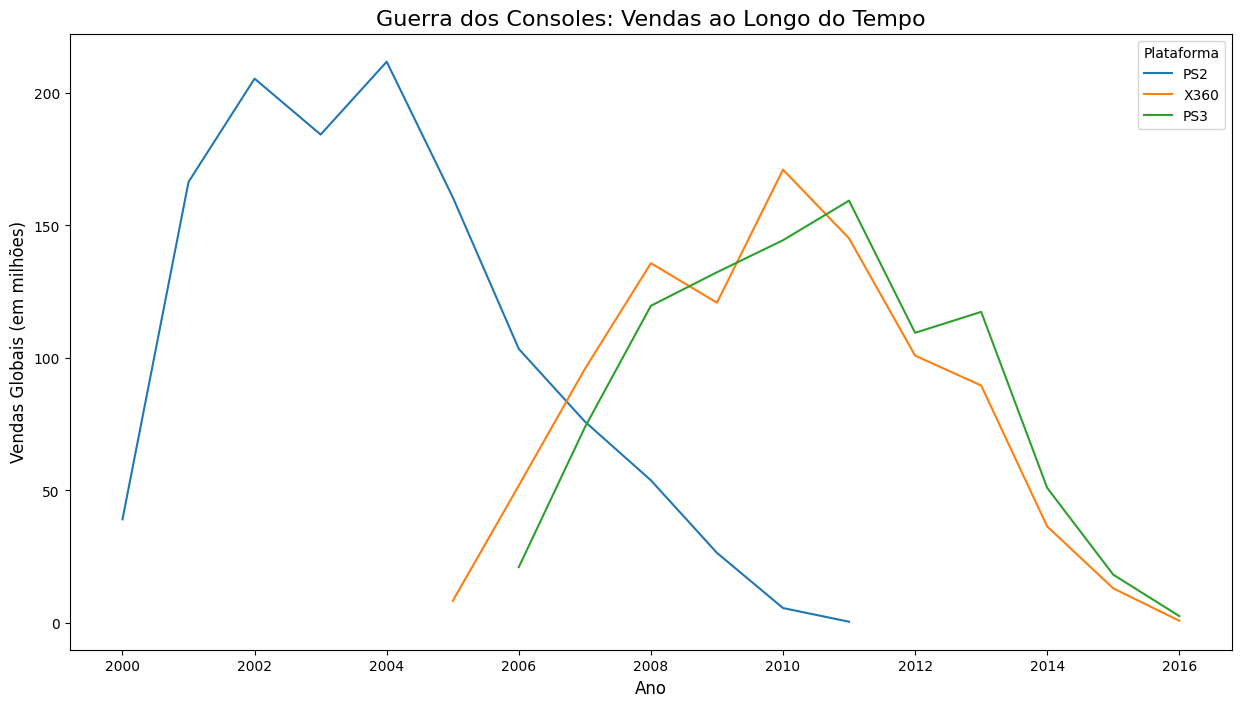

In [43]:
# Primeiro, selecionamos os consoles que queremos comparar.
# Pegamos os 10 consoles mais vendidos da história.
principais_consoles = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(3).index

# Filtramos nosso DataFrame para conter apenas os dados desses consoles
df_consoles = df[df['Platform'].isin(principais_consoles)]

# Agrupamos por ano e plataforma, somando as vendas
vendas_consoles_ano = df_consoles.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Criamos o gráfico de linhas, usando o parâmetro 'hue' para desenhar uma linha por console
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Global_Sales', data=vendas_consoles_ano, hue='Platform')

plt.title('Guerra dos Consoles: Vendas ao Longo do Tempo', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.legend(title='Plataforma')
plt.show()

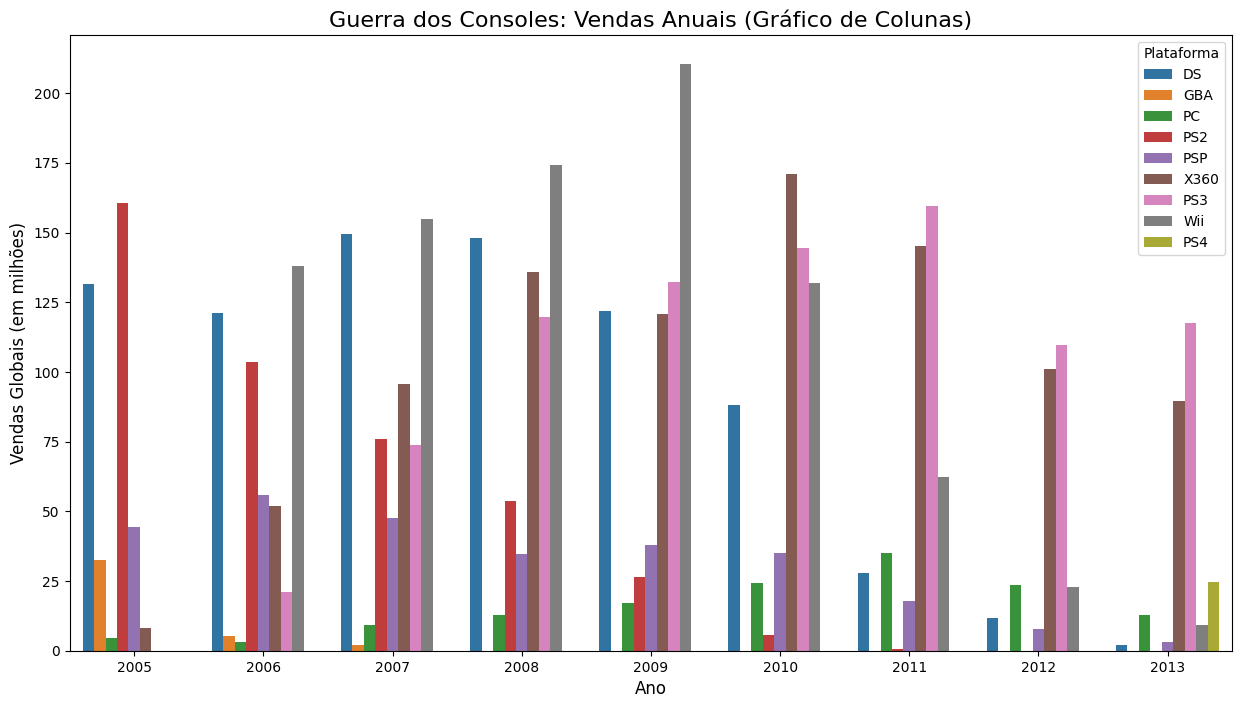

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- A PREPARAÇÃO DOS DADOS É A MESMA ---
# 1. Selecionamos os 10 consoles mais vendidos.
principais_consoles = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(3).index

# 2. Filtramos nosso DataFrame para conter apenas os dados desses consoles
df_consoles = df[df['Platform'].isin(principais_consoles)]

# 3. Agrupamos por ano e plataforma, somando as vendas
vendas_consoles_ano = df_consoles.groupby(['Year', 'Platform'])['Global_Sales'].sum().reset_index()

# Filtramos para um período de tempo menor, pois o gráfico de barras fica muito cheio com muitos anos
vendas_consoles_ano = vendas_consoles_ano[vendas_consoles_ano['Year'].between(2005, 2013)]


# --- A CRIAÇÃO DO GRÁFICO ---
plt.figure(figsize=(15, 8))

# A ÚNICA MUDANÇA ESTÁ AQUI: trocamos lineplot por barplot
sns.barplot(x='Year', y='Global_Sales', data=vendas_consoles_ano, hue='Platform')

plt.title('Guerra dos Consoles: Vendas Anuais (Gráfico de Colunas)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Vendas Globais (em milhões)', fontsize=12)
plt.legend(title='Plataforma')
plt.show()